In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split , cross_validate , StratifiedKFold , GridSearchCV , RandomizedSearchCV

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('advertising(PCVT).csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0


In [9]:
df.drop(['Country' , 'City' , 'Timestamp' ,'Ad Topic Line'] , axis = 1 , inplace = True)

In [31]:
mapper = {
    'Female':1,
    'Male':0
}

In [35]:
df['Gender'] = df['Gender'].map(mapper)

In [37]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
0,68.95,35,61833.90,256.09,1,0
1,80.23,31,68441.85,193.77,0,0
2,69.47,26,59785.94,236.50,1,0
3,74.15,29,54806.18,245.89,0,0
4,68.37,35,73889.99,225.58,1,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,0,1
996,51.30,45,67782.17,134.42,0,1
997,51.63,51,42415.72,120.37,0,1
998,55.55,19,41920.79,187.95,1,0


### SequentialFeatureSelector

In [39]:
x , y = df.drop(['Clicked on Ad'] ,axis=1) ,  df['Clicked on Ad']

#### backward

In [42]:
pl = make_pipeline(StandardScaler() , DecisionTreeClassifier())
pl

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [44]:
sfs = SequentialFeatureSelector(estimator=pl ,n_features_to_select=2 , cv = 5 , scoring='accuracy', direction='backward')

In [46]:
sfs.fit_transform(x , y)

array([[ 68.95, 256.09],
       [ 80.23, 193.77],
       [ 69.47, 236.5 ],
       ...,
       [ 51.63, 120.37],
       [ 55.55, 187.95],
       [ 45.01, 178.35]])

In [48]:
sfs.get_feature_names_out()

array(['Daily Time Spent on Site', 'Daily Internet Usage'], dtype=object)

#### forward

In [57]:
sfs = SequentialFeatureSelector(estimator=pl ,n_features_to_select=3 , cv = 5 , scoring='accuracy', direction='forward')

In [59]:
sfs.fit_transform(x , y)

array([[6.895000e+01, 6.183390e+04, 2.560900e+02],
       [8.023000e+01, 6.844185e+04, 1.937700e+02],
       [6.947000e+01, 5.978594e+04, 2.365000e+02],
       ...,
       [5.163000e+01, 4.241572e+04, 1.203700e+02],
       [5.555000e+01, 4.192079e+04, 1.879500e+02],
       [4.501000e+01, 2.987580e+04, 1.783500e+02]])

In [61]:
sfs.get_feature_names_out()

array(['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage'],
      dtype=object)

In [63]:
rf = RandomForestClassifier()

In [65]:
rf.fit(x , y)

RandomForestClassifier()

In [75]:
rf.feature_importances_

array([0.34437226, 0.09751069, 0.10396926, 0.44917432, 0.00497347])

In [69]:
rf.feature_names_in_

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender'], dtype=object)

<Axes: >

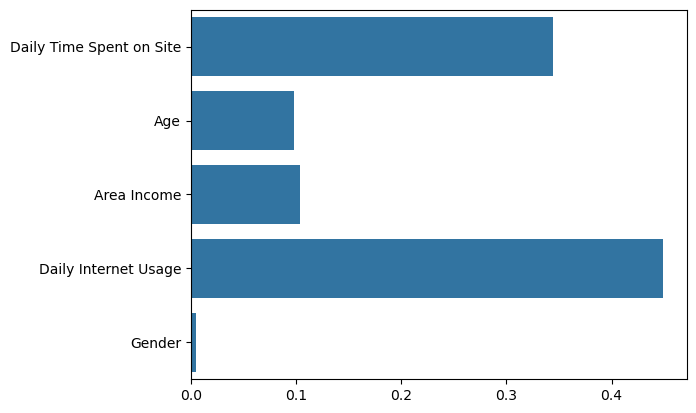

In [81]:
sns.barplot(x = rf.feature_importances_ ,y = rf.feature_names_in_ )

#### embeded method

In [84]:
from sklearn.feature_selection import SelectFromModel

In [86]:
model_selctor = SelectFromModel(estimator=LogisticRegression())

In [90]:
model_selctor.fit_transform(x ,  y)

C:\Users\youse\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[35.],
       [31.],
       [26.],
       [29.],
       [35.],
       [23.],
       [33.],
       [48.],
       [30.],
       [20.],
       [49.],
       [37.],
       [48.],
       [24.],
       [33.],
       [23.],
       [37.],
       [41.],
       [36.],
       [40.],
       [30.],
       [35.],
       [52.],
       [36.],
       [41.],
       [28.],
       [28.],
       [52.],
       [34.],
       [22.],
       [35.],
       [28.],
       [57.],
       [23.],
       [57.],
       [30.],
       [53.],
       [39.],
       [46.],
       [39.],
       [29.],
       [30.],
       [32.],
       [31.],
       [25.],
       [52.],
       [20.],
       [43.],
       [37.],
       [46.],
       [23.],
       [28.],
       [45.],
       [50.],
       [47.],
       [31.],
       [36.],
       [49.],
       [29.],
       [41.],
       [27.],
       [34.],
       [29.],
       [32.],
       [45.],
       [29.],
       [40.],
       [32.],
       [25.],
       [34.],
       [31.],
      

### Feature selection methods with pipeline 

In [97]:
model = make_pipeline(StandardScaler() , SelectFromModel(estimator=DecisionTreeClassifier()) , RandomForestClassifier())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('randomforestclassifier', RandomForestClassifier())])

In [99]:
cv = cross_validate(estimator=model , X=x ,  y =y , scoring='accuracy' , cv = 5 , return_train_score=True)

In [105]:
cv['train_score'].mean()

0.9957499999999999

In [109]:
cv['test_score'].mean()

0.8560000000000001

In [111]:
model = make_pipeline(StandardScaler() , SelectFromModel(estimator=LogisticRegression()) , SVC())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LogisticRegression())),
                ('svc', SVC())])

In [113]:
cv = cross_validate(estimator=model , X=x ,  y =y , scoring='accuracy' , cv = 5 , return_train_score=True)

In [117]:
cv['train_score'].mean()

0.95325

In [119]:
cv['test_score'].mean()

0.946

In [137]:
model = make_pipeline(StandardScaler() , 
                      SequentialFeatureSelector(estimator=LogisticRegression() ,
                                                n_features_to_select=3 , cv = 5 ,
                                                                   scoring='accuracy', 
                                                                   direction='forward') , 
                      SVC(kernel='linear'))
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(estimator=LogisticRegression(),
                                           n_features_to_select=3,
                                           scoring='accuracy')),
                ('svc', SVC(kernel='linear'))])

In [139]:
cv = cross_validate(estimator=model , X=x ,  y =y , scoring='accuracy' , cv = 5 , return_train_score=True)

In [140]:
cv['train_score'].mean()

0.95875

In [143]:
cv['test_score'].mean()

0.954